###**NLP Based Industry safety Chatbot**

**CONTEXT:** The  database  comes  fromone  of  the  biggest  industry  in  Brazil  and  in  the  world.  It  is  an  urgent  need  for  industries/companies  around  the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

•**DATA DESCRIPTION:** This  The  database  is  basically  records  of  accidents  from12  different  plants  in  03  different  countrieswhich  every  line  in  the  data  is  an occurrence of an accident.

**Columns description:** 

**‣Data:** timestamp or time/date information

**‣Countries:** which country the accident occurred (anonymised)

**‣Local:** the city where the manufacturing plant is located (anonymised)

**‣Industry sector:** which sector the plant belongs to

**‣Accident level:** from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

**‣Potential Accident Level:** Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)

**‣Genre:** if the person is male of female‣Employee or Third Party: if the injured person is an employee or a third party

**‣Critical Risk:** some description of the risk involved in the accident

**‣Description:** Detailed description of how the accident happened.

**Link to download the dataset:** https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

•**PROJECT OBJECTIVE:** Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

In [ ]:
import plotly
print(plotly.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
# Basic packages
import seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint

# Models
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from wordcloud import WordCloud, STOPWORDS

4.4.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv("/content/drive/MyDrive/NLP_Project/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
data.head()

Mounted at /content/drive/


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee type             425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [ ]:
columns = data[data.columns[~data.columns.isin(['Description', 'Unnamed: 0', 'Data'])]].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{data[cols].unique()}\n')

Unique values for Date is 
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00' '2016-03-05 00:00:00'
 '2016-03-06 00:00:00' '2016-03-09 00:00:00' '2016-03-11 00:00:00'
 '2016-03-13 00:00:00' '2016-03-12 

In [ ]:
replace_struc = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
data['Local'] = data['Local'].map(replace_struc)
replace_struc = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4}
data['Accident Level'] = data['Accident Level'].map(replace_struc)
replace_struc = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4, 'VI': 5}
data['Potential Accident Level'] = data['Potential Accident Level'].map(replace_struc)
del replace_struc

In [ ]:
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x : x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)

data['Weekday'] = data['Date'].apply(lambda x : x.day_name())
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Weekday
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday


**Analysis of attibutes/columns of given dataset**

**Univariate Analysis**

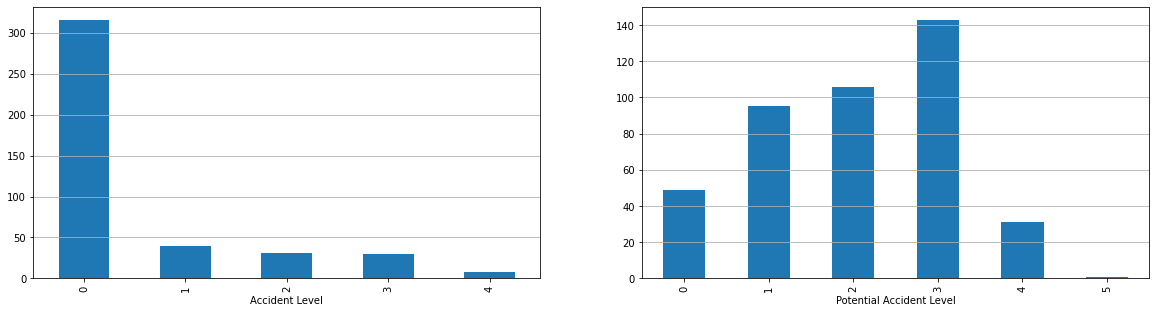

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
data[acc_level].reset_index().groupby(acc_level).count().plot(kind="bar", legend=False, 
        ax=ax[0]).grid(axis='y')

pot_acc_level = "Potential Accident Level"
data[pot_acc_level].reset_index().groupby(pot_acc_level).count().plot(kind="bar", legend=False, 
        ax=ax[1]).grid(axis='y')


plt.show()

  Accident level I is the most occured accident level of all the accidents in the dataset.

  Potential Accident level IV is the most occured potential accident level of all the accidents in the dataset.


**Country**

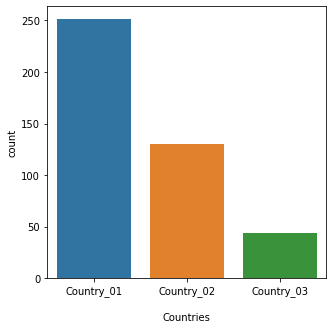

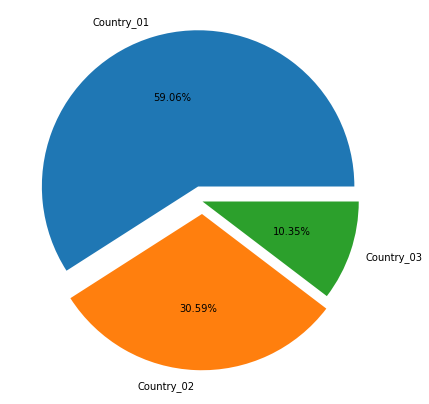

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Country'],order=data['Country'].value_counts().index)
plt.xlabel("\nCountries")

plt.figure(figsize=(7,10))
plt.pie(data['Country'].value_counts(), labels=['Country_01','Country_02','Country_03'], explode=(0.1,0.08,0),autopct = '%1.2f%%');

The most affected country from the above dataset is country_01 with around 59% of the accidents.

**Most accidents happened in Country_01 .Its count is 251 ,which is equivalent to 59.06% .**

**Local**

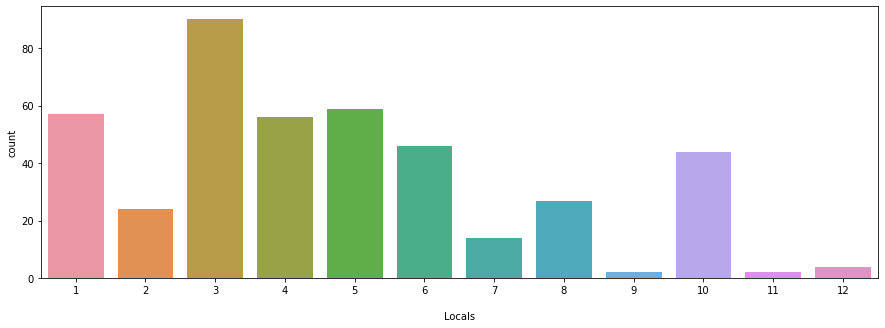

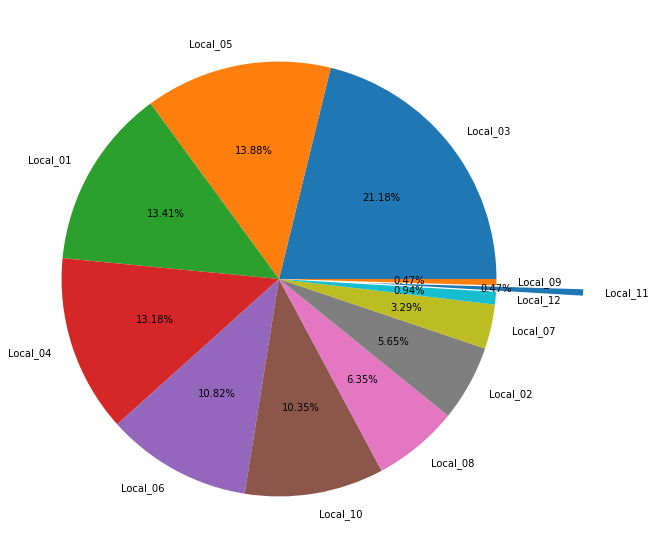

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['Local'])
plt.xlabel("\nLocals")

plt.figure(figsize=(10,10))
plt.pie(data['Local'].value_counts(), labels=['Local_03','Local_05','Local_01','Local_04','Local_06','Local_10',
                                                'Local_08','Local_02','Local_07','Local_12','Local_11','Local_09'], 
                                                  explode=(0,0,0,0,0,0,0,0,0,0,0.4,0),autopct = '%1.2f%%')
plt.show()

**Most accidents happened in Local_03 .Its count is 90 ,which is equivalent to 21.18% .**

**Industry Sector**

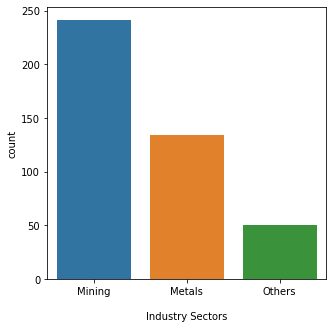

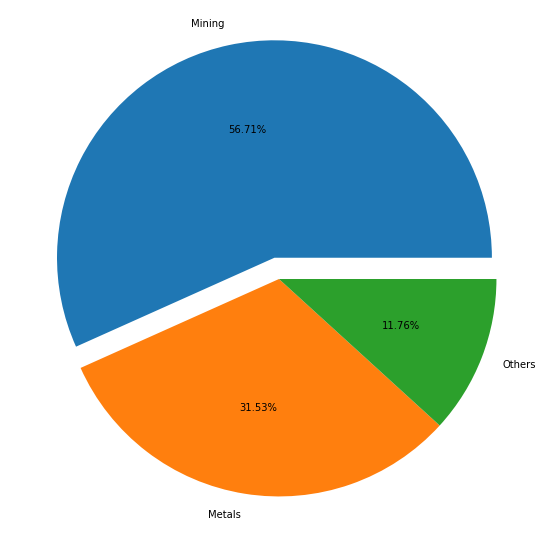

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Industry Sector'])
plt.xlabel("\nIndustry Sectors")

plt.figure(figsize=(10,10))
plt.pie(data['Industry Sector'].value_counts(), labels=['Mining', 'Metals', 'Others'], explode=(0.1,0,0),autopct = '%1.2f%%');


Mostly affected sector is Mining sector. 56.71% of accidents occur in Mining sector.

**Most accidents happened in mining Industry sector .Its count is 241 ,which is equivalent to 56.71%.**

**Accident level**

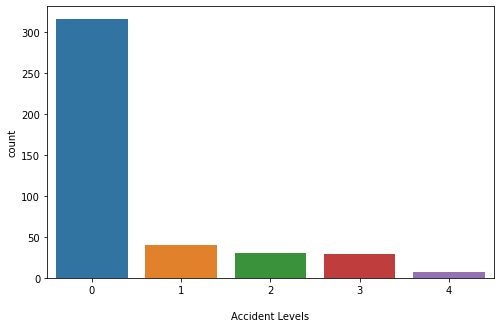

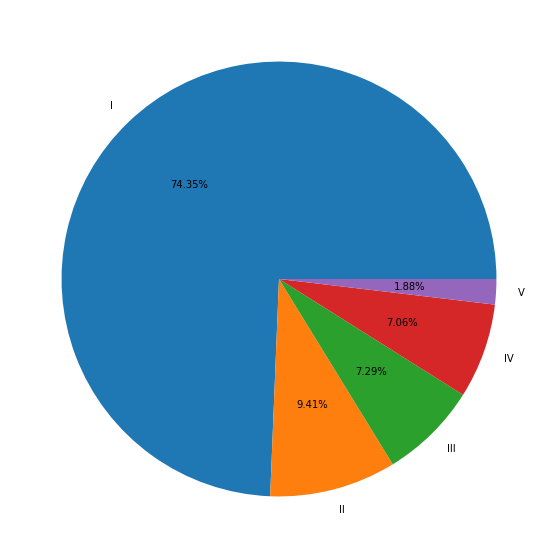

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Accident Level'])
plt.xlabel("\nAccident Levels")

plt.figure(figsize=(10,10))
plt.pie(data['Accident Level'].value_counts(), labels=['I', 'II', 'III' ,'IV' ,'V'], explode=(0,0,0,0,0),autopct = '%1.2f%%')
plt.show()

**Most accidents belongs to "Accident Level" I .Its count is 316 which is equivalent to 74.35%% of total accidents.**

**Potential Accident level**

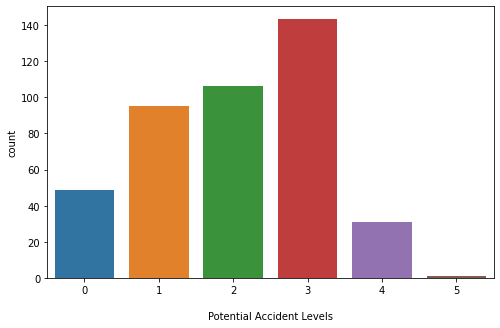

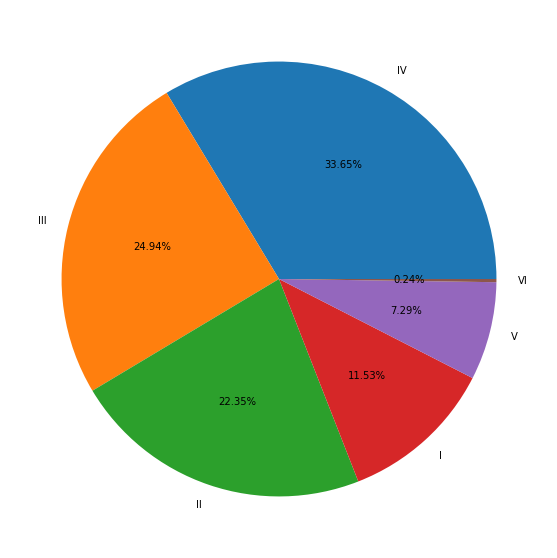

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Potential Accident Level'])
plt.xlabel("\nPotential Accident Levels")

plt.figure(figsize=(10,10))
plt.pie(data['Potential Accident Level'].value_counts(), labels=['IV','III','II','I','V','VI'], explode=(0,0,0,0,0,0),autopct = '%1.2f%%')
plt.show()

**Most "Potential Accident Level" belongs to level IV .Its count is 143 which is equivalent to 33.65% of total potential accidents.**

**Gender**

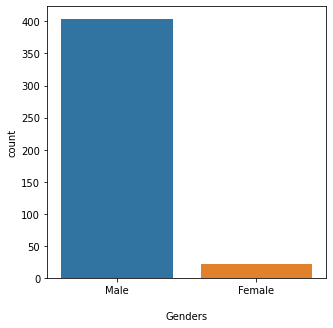

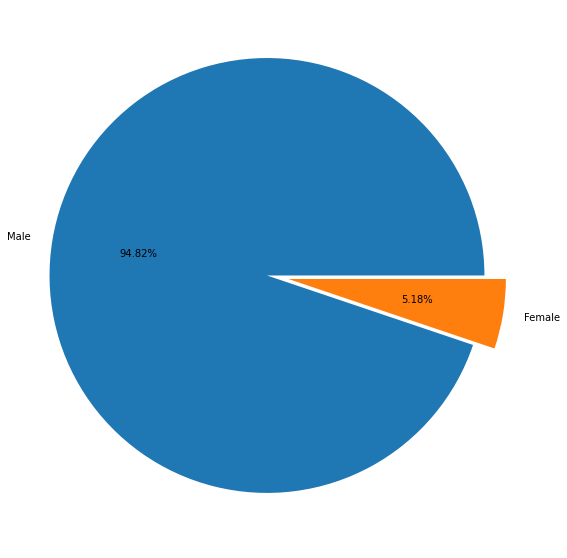

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Gender'])
plt.xlabel("\nGenders")

plt.figure(figsize=(10,10))
plt.pie(data['Gender'].value_counts(), labels=['Male', 'Female'], explode=(0.1,0),autopct = '%1.2f%%');


**Most affected wokers in accidents are male .Their count is 403 ,which is equivalent to 94.82%**

**Employee type**

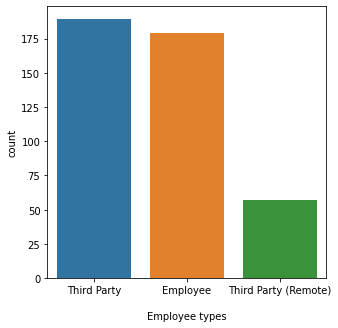

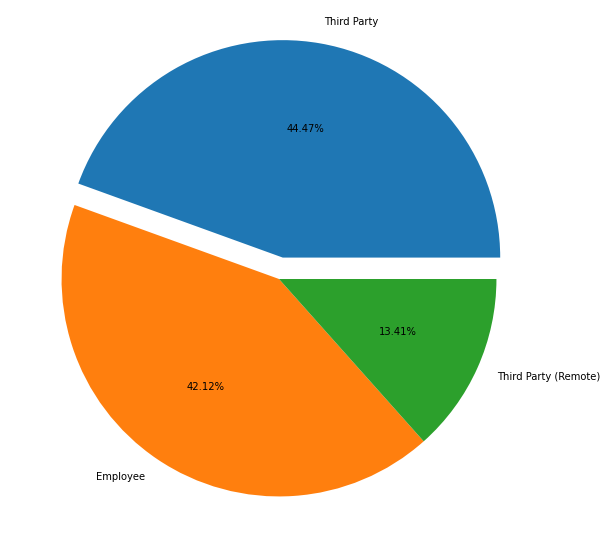

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Employee type'])
plt.xlabel("\nEmployee types")

plt.figure(figsize=(10,10))
plt.pie(data['Employee type'].value_counts(), labels=['Third Party', 'Employee', 'Third Party (Remote)'], explode=(0.1,0,0),autopct = '%1.2f%%');

Employee type of Third party is most prone to Accident risk.

**Most affected Employee type are Third party workers .Their count is 189 ,which is equivalent to 44.47%.**

**Critical Risk**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

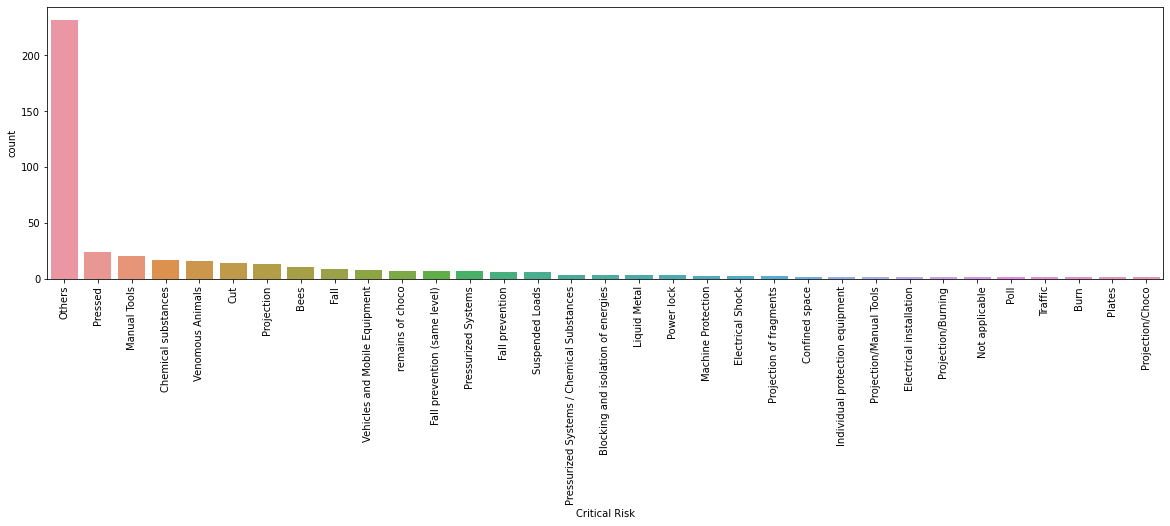

In [ ]:
plt.figure(figsize=(20,5))
descending_order = data['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=data['Critical Risk'],order=descending_order);
plt.xticks(rotation = 'vertical')

**Risk Factor Analysis:**

When we count the number of incidents by each type of critical risk, **Others** tops the list.

**Year**

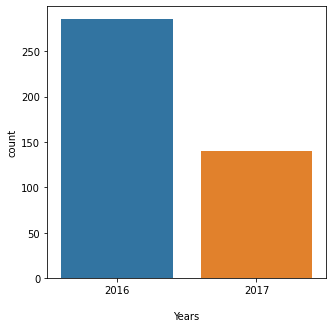

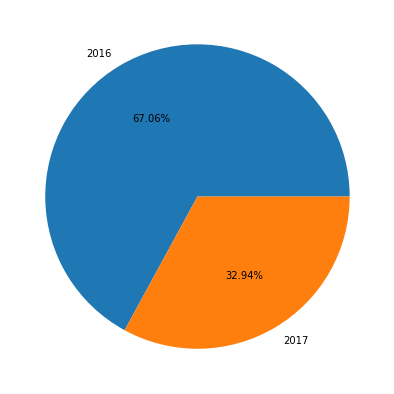

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Year'])
plt.xlabel("\nYears")

plt.figure(figsize=(7,7))
plt.pie(data['Year'].value_counts(), labels=['2016', '2017'], explode=(0,0),autopct = '%1.2f%%')

plt.show()

 **Most accidents happend in year 2016.Count is 285 ,which is equivalent to 67.06% .**

**Month**

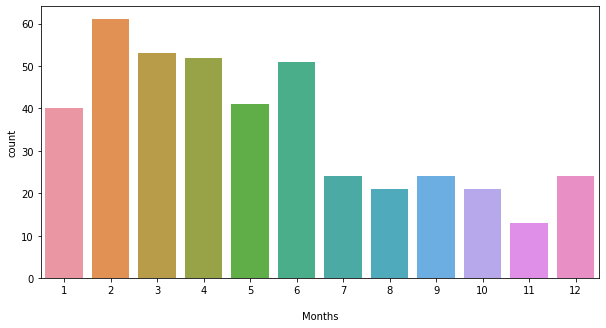

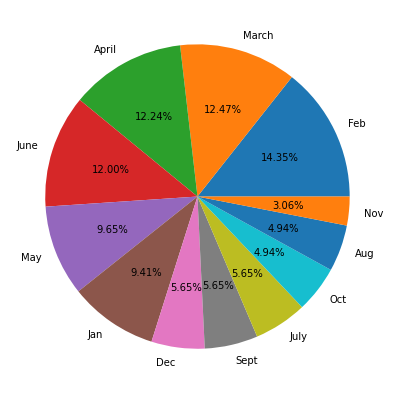

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Month'])
plt.xlabel("\nMonths")

plt.figure(figsize=(7,7))
plt.pie(data['Month'].value_counts(), labels=['Feb', 'March','April', 'June','May', 'Jan','Dec', 'Sept','July', 'Oct','Aug', 'Nov'], explode=(0,0,0,0,0,0,0,0,0,0,0,0),autopct = '%1.2f%%')

plt.show()

**Most accidents happend in Feb month.Count is 61 ,which is equivalent to 14.35%**

**Weekday**

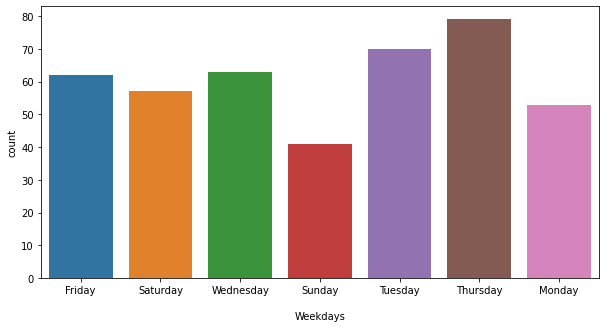

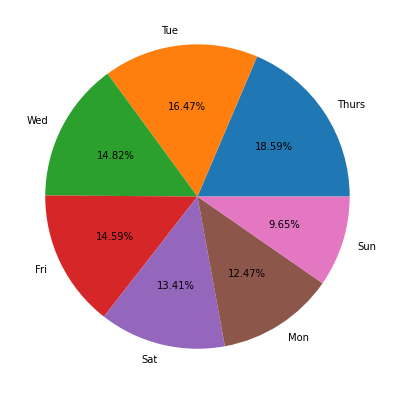

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Weekday'])
plt.xlabel("\nWeekdays")

plt.figure(figsize=(7,7))
plt.pie(data['Weekday'].value_counts(), labels=['Thurs', 'Tue','Wed', 'Fri','Sat', 'Mon','Sun'], explode=(0,0,0,0,0,0,0),autopct = '%1.2f%%')

plt.show()

**Most accidents happend in Thursday .Count is 79 ,which is equivalent to 18.59%**

**Multivariate Analysis:**

**Analysis of Industry Sector wrt Accident/ Potential Accident Level**

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

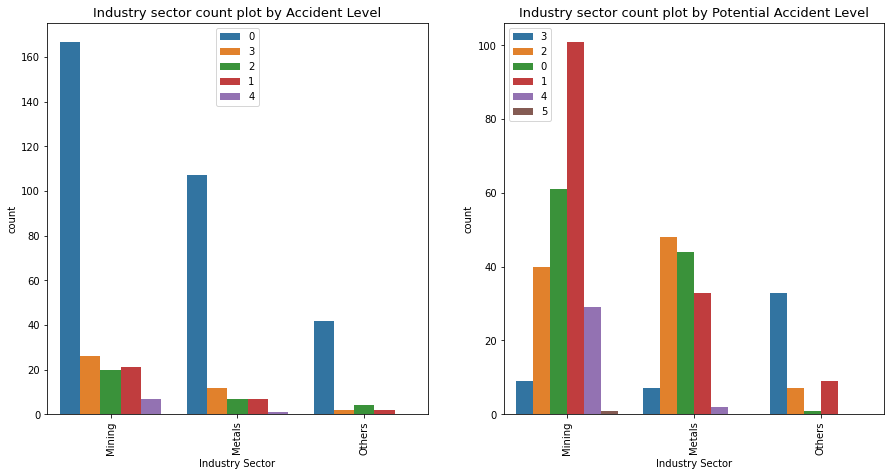

In [ ]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Industry Sector', data = data, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Industry Sector'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Industry Sector' , data = data, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Industry Sector'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Potential Accident Level'].unique())
plt.xticks(rotation = 90)



#### **Industry Sector Vs Accident Level**
*   **Accident level I is highest in all industry sector (Mining, Metals and Other).**
*   **Most accidents happened in Mining industry sector.**
*   **Others industry sector has less accidents in comparision to other industries.**
*   **There are very few cases for Accident level 5.Others sector didn't reported any case for this level**

#### **Industry Sector Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in all industry sector (Mining, Metals and Others).**
*   **Most accidents happened in Mining industry sector.**
*   **Others industry sector has less accidents in comparision to other industries.**
*   **These are very few cases for Accident level 6.Metals and Others sector didn;t reported case for this accident level**




**Analysis of Country wrt Accident/ Potential Accident Level**

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

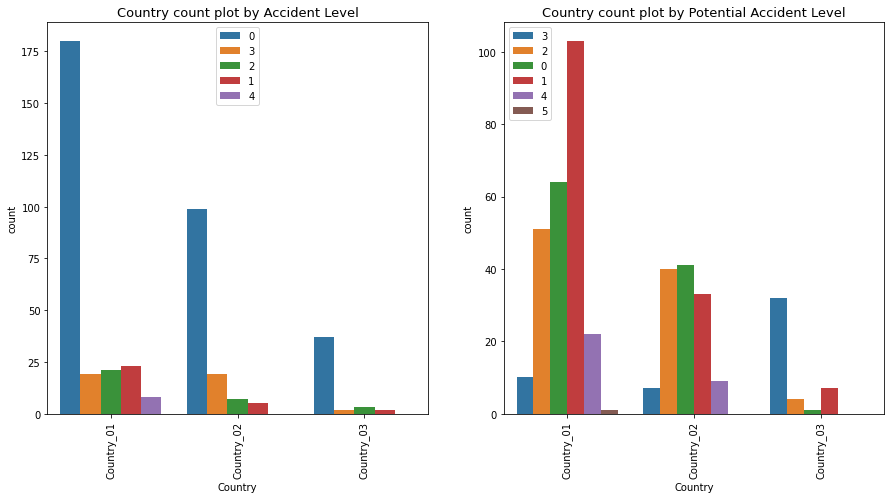

In [ ]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Country', data = data, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Country'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Country' , data = data, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Country'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Potential Accident Level'].unique())
plt.xticks(rotation = 90)




#### **Country Vs Accident Level**
*   **Accident level I is highest in all countries.**
*   **Most accidents happened in country 1.**
*   **Accident level in country 3 is lesser than other countries.**

#### **Country Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in Country 1.**
*   **Most accidents happened in country 1.**
*   **Accident level in country 3 is lesser than other countries.**

**Analysis of Year with respect to Accident/ Potential Accident Level**

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

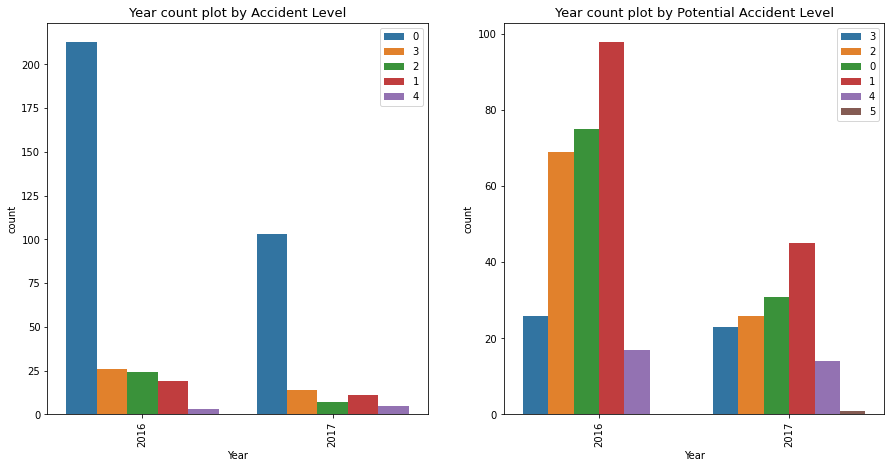

In [ ]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Year', data = data, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Year'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Year' , data = data, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Year'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Potential Accident Level'].unique())
plt.xticks(rotation = 90)






#### **Year Vs Accident Level**
*   **Accident level I is highest in year 2016 and 2017.**
*   **In Year 2016 more accidents happened in than 2017.**

#### **Year Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in year 2016 and 2017.**
*   **In Year 2016 more potential accidents happened in than 2017.**
*   **Potential Accident level 6 is didn;t happened in year 2016.**

**Local Vs Accident level and Local Vs Potential accident level**

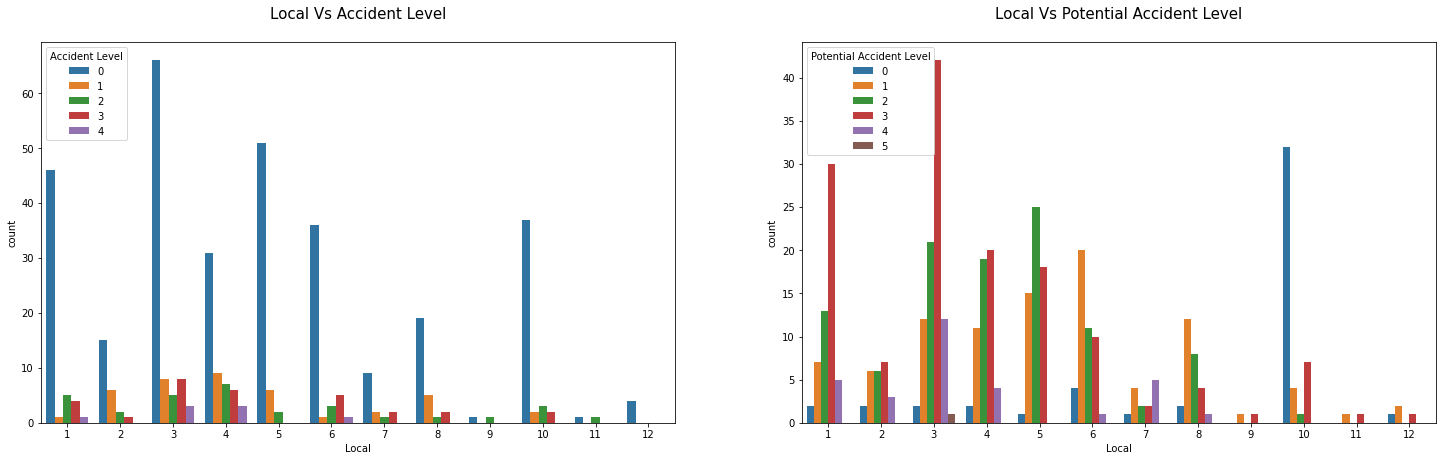

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(25,7)

sns.countplot(x=data['Local'], hue = data['Accident Level'],ax = ax1)
ax1.set_title('Local Vs Accident Level\n',fontsize = 15)

sns.countplot(x=data['Local'],hue = data['Potential Accident Level'],ax=ax2)
ax2.set_title('Local Vs Potential Accident Level\n',fontsize = 15)

plt.show()

#### **Local Vs Accident Level**
*   **Accident level I is highest in almost all localities.**
*   **Accident level I is highest in Local 3.**
*   **Local 9,11 and 12 have less accidents level.**

#### **Local Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in Local 3.**
*   **Potential Accident level 4 is higher in most localities.**
*   **Local 9,11 and 12 have less potential accidents level.**
*   **Potential Accident level 1 is highest in local 10.**
*   **Potential Accident level 3 is highest in local 5.**

**Year Vs Accident level and Year Vs Potential accident level**

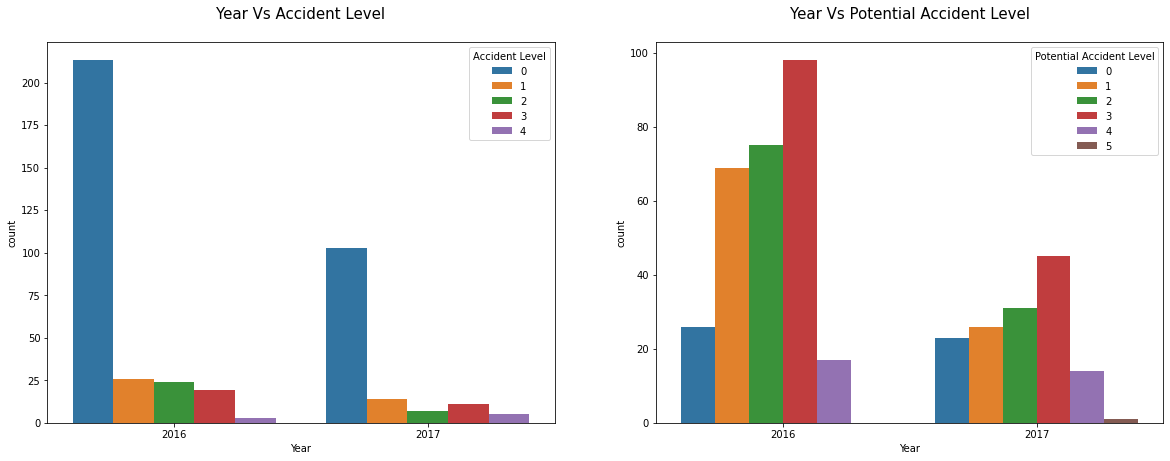

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,7)

sns.countplot(x=data['Year'], hue = data['Accident Level'],ax = ax1)
ax1.set_title('Year Vs Accident Level\n',fontsize = 15)

sns.countplot(x=data['Year'],hue = data['Potential Accident Level'],ax=ax2)
ax2.set_title('Year Vs Potential Accident Level\n',fontsize = 15)

plt.show()

#### **Year Vs Accident Level**
*   **Accident level I is highest in year 2016 and 2017.**
*   **In Year 2016 more accidents happened in than 2017.**

#### **Year Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in year 2016 and 2017.**
*   **In Year 2016 more potential accidents happened in than 2017.**
*   **Potential Accident level 6 is didn;t happened in year 2016.**

**Local Vs Year**

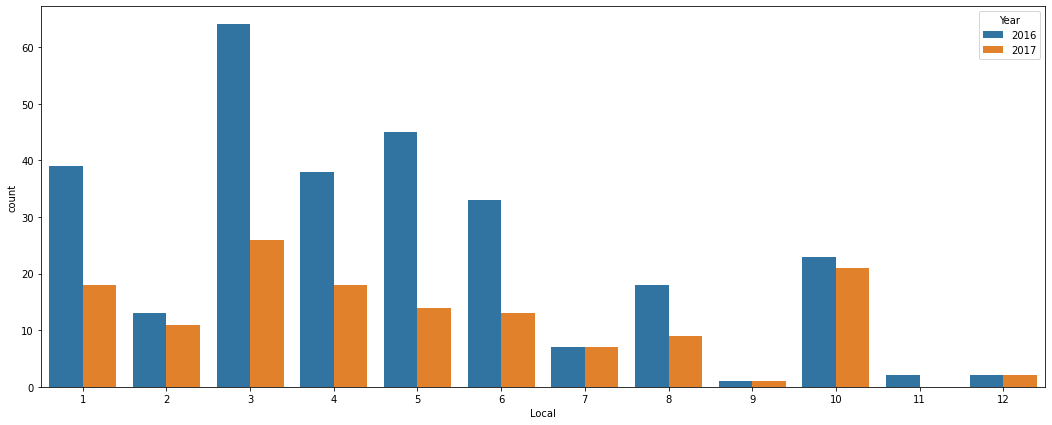

In [ ]:
plt.figure(figsize=(18,7))
sns.countplot(x=data["Local"],hue=data["Year"]);

*   **In 2016 and 2017 local 3 has more accidents than other localities.**
*   **Local 9,11,12 has less accidents in 2016 and 2017 than all other localities**

**Country Vs Year**

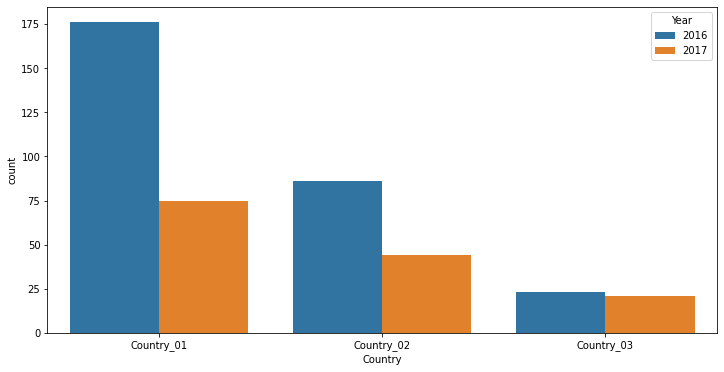

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=data["Country"],hue=data["Year"]);

*   **In 2016 and 2017 country 1 has more accidents than other countries.**
*   **In 2016 and 2017 country 3 has least accidents than other countries.**

**Analyzing Country and Employee Type**


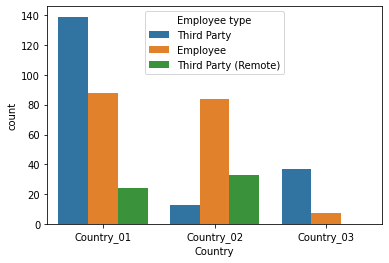

In [ ]:
sns.countplot(x="Country", data=data, hue="Employee type");

Incidents in Country_01 has Employee type of Third Party high in number.

Incidents in Country_02 has Employee type of Employee high in number.

Incidents in Country_03 has Employee type of Third Party high in number.

**Analyzing Country and Industry Sector**

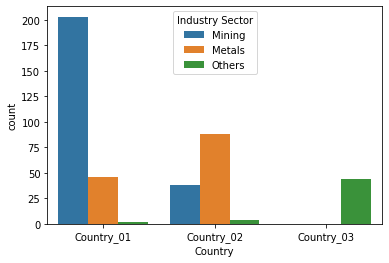

In [ ]:
sns.countplot(x="Country", data=data, hue="Industry Sector");


In Country_01, Incidents in Mining sector are very high.

In Country_02, Incidents in Metals sector are very high.

In Country_03, Incidents in Other sectors are very high.

**Local Vs Employee Type**

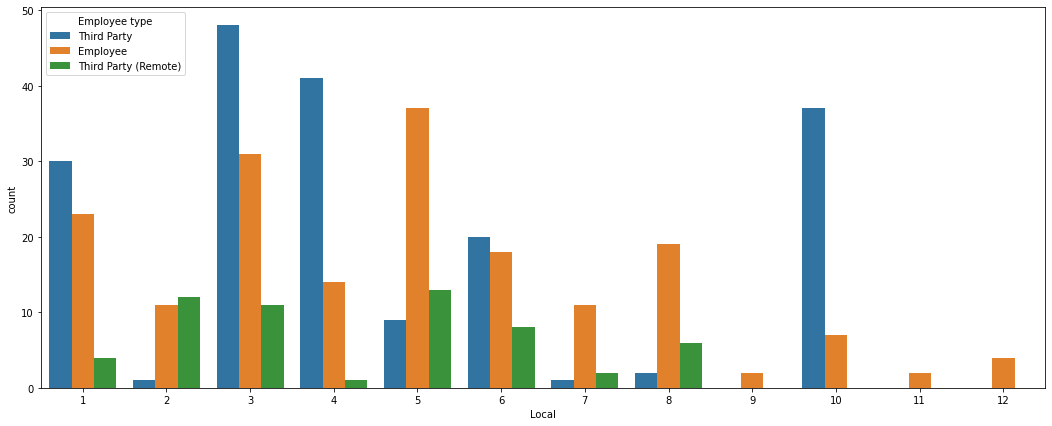

In [ ]:
plt.figure(figsize=(18,7))
sns.countplot(x=data["Local"], hue=data["Employee type"]);

*   **Local 3 has highest no of Third Party employees**
*   **Local 3 has more employees than other localities.**
*   **Local 10 don;t have Third Party (Remote) employees.**
*   **Local 9,11,12 don;t have Employee and Third Party employees.**

**Local vs Industry Sector**

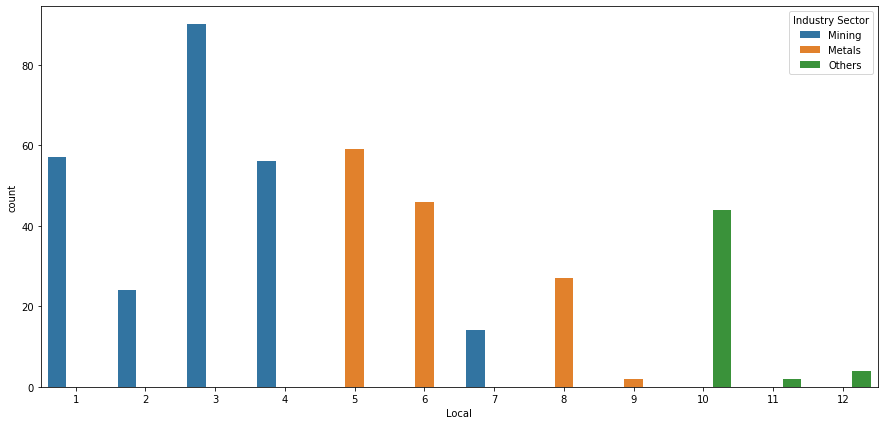

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Local"],hue=data["Industry Sector"]);

*   **Local 3 has highest number of Mining industry sector.**
*   **Local 5 has highest number of Metals industry sector.**
*   **Local 1,2,3,4,7 has Mining industry sector.**
*   **Local 5,6,8,9 has Metals industry sector.**
*   **Local 10,11,12 has Others industry sector.**

**Local vs Country**

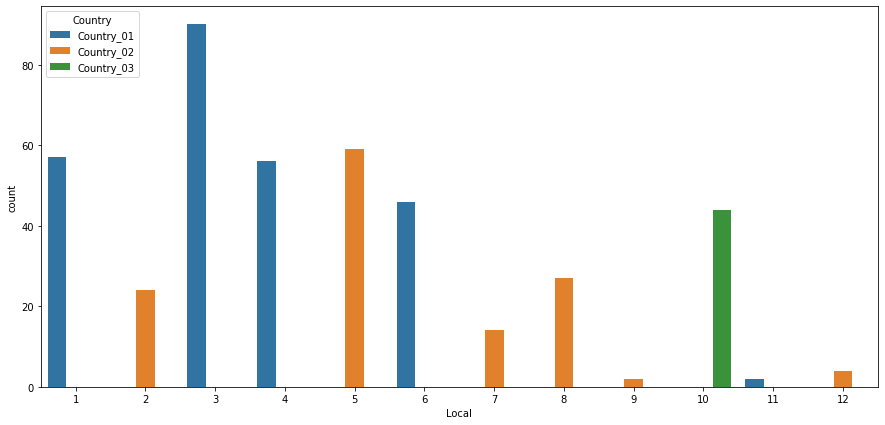

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Local"],hue=data["Country"]);

*   **Local 3 has biggest in Country 1.**
*   **Local 2 has biggest in Country 1..**
*   **Local 1,3,4,6,11 belongs to country 1.**
*   **Local 2,5,7,8,9,12 belongs to country 2.**
*   **Local 10 belongs to country 3.**

**Text Pre-processing**

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
nltk.download('stopwords')
stop=set(stopwords.words('english'))

def preprocess_text(text):
      corpus=[]
      #stem=PorterStemmer()
      lem=WordNetLemmatizer()
      for news in text:
          words=[w for w in word_tokenize(news) if (w not in stop)]
          
          words=[lem.lemmatize(w) for w in words if len(w)>2]
          words = [''.join(c for c in s if c not in string.punctuation) for s in words if s]
          words = [word.lower() for word in words]
          words = [word for word in words if word.isalpha()]
          corpus.append(words) 
         
      return corpus     
      
data['processed_text']= preprocess_text(data['Description'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Weekday,processed_text
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,"[while, removing, drill, rod, jumbo, maintenan..."
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday,"[during, activation, sodium, sulphide, pump, p..."
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday,"[substation, milpo, located, level, collaborat..."
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday,"[being, approximately, personnel, begin, task,..."
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday,"[approximately, am, circumstance, mechanic, an..."


In [ ]:
data['processed_text']

0      [while, removing, drill, rod, jumbo, maintenan...
1      [during, activation, sodium, sulphide, pump, p...
2      [substation, milpo, located, level, collaborat...
3      [being, approximately, personnel, begin, task,...
4      [approximately, am, circumstance, mechanic, an...
                             ...                        
420    [being, approximately, am, approximately, lift...
421    [the, collaborator, moved, infrastructure, off...
422    [during, environmental, monitoring, activity, ...
423    [the, employee, performed, activity, stripping...
424    [am, assistant, cleaned, floor, module, centra...
Name: processed_text, Length: 425, dtype: object

In [ ]:
lgt = []
for i in data['processed_text']:
  lgt.append(len(i))
print('Maximum length of the sentence in processed text (in list) :',max(lgt))

Maximum length of the sentence in processed text (in list) : 95


In [ ]:
data

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Weekday,processed_text
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,"[while, removing, drill, rod, jumbo, maintenan..."
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday,"[during, activation, sodium, sulphide, pump, p..."
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday,"[substation, milpo, located, level, collaborat..."
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday,"[being, approximately, personnel, begin, task,..."
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday,"[approximately, am, circumstance, mechanic, an..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04,Country_01,4,Mining,0,2,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,7,Tuesday,"[being, approximately, am, approximately, lift..."
421,2017-07-04,Country_01,3,Mining,0,1,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,7,Tuesday,"[the, collaborator, moved, infrastructure, off..."
422,2017-07-05,Country_02,9,Metals,0,1,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017,7,Wednesday,"[during, environmental, monitoring, activity, ..."
423,2017-07-06,Country_02,5,Metals,0,1,Male,Employee,Cut,The Employee performed the activity of strippi...,2017,7,Thursday,"[the, employee, performed, activity, stripping..."


In [ ]:
desc_processed = []
for i in range(len(data['processed_text'])):
   desc_processed.append(' '.join(wrd for wrd in data.iloc[:,13][i]))
    
  

In [ ]:
data['description_processed'] = desc_processed

In [ ]:
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Weekday,processed_text,description_processed
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,"[while, removing, drill, rod, jumbo, maintenan...",while removing drill rod jumbo maintenance sup...
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday,"[during, activation, sodium, sulphide, pump, p...",during activation sodium sulphide pump piping ...
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday,"[substation, milpo, located, level, collaborat...",substation milpo located level collaborator ex...
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday,"[being, approximately, personnel, begin, task,...",being approximately personnel begin task unloc...
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday,"[approximately, am, circumstance, mechanic, an...",approximately am circumstance mechanic anthony...


**Number of characters present in each sentence**

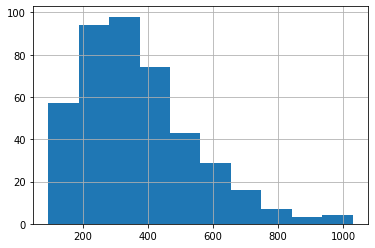

In [ ]:
data['Description'].str.len().hist();


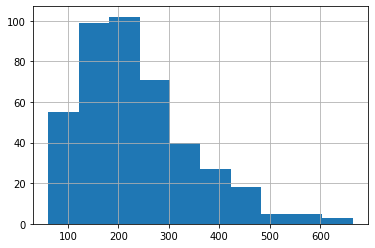

In [ ]:
data['description_processed'].str.len().hist();

**Number of words appearing in each description**

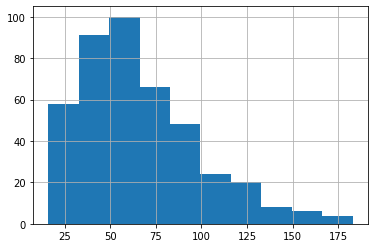

In [ ]:
data['Description'].str.split().map(lambda x: len(x)).hist();

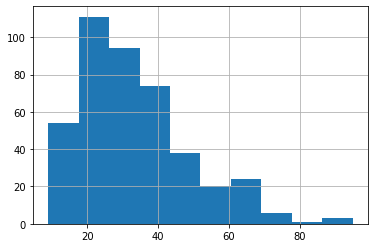

In [ ]:
data['description_processed'].str.split().map(lambda x: len(x)).hist();

**Average word length**

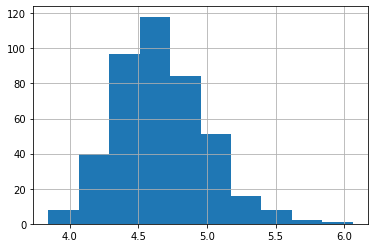

In [ ]:
data['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

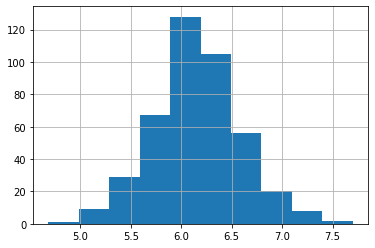

In [ ]:
data['description_processed'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

**Analyzing N-Grams**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams= get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

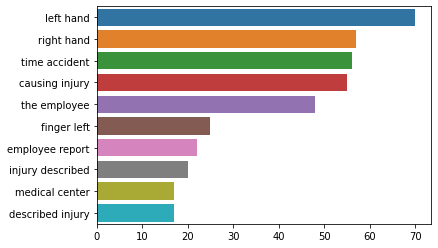

In [ ]:
plot_top_ngrams_barchart(data['description_processed'],2)

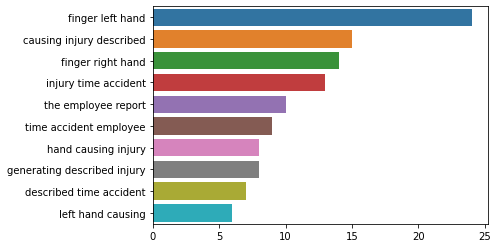

In [ ]:
plot_top_ngrams_barchart(data['description_processed'],3)

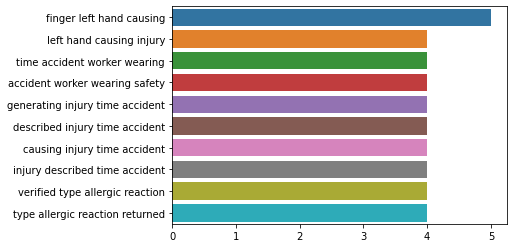

In [ ]:
plot_top_ngrams_barchart(data['description_processed'],4)

**Wordcloud**

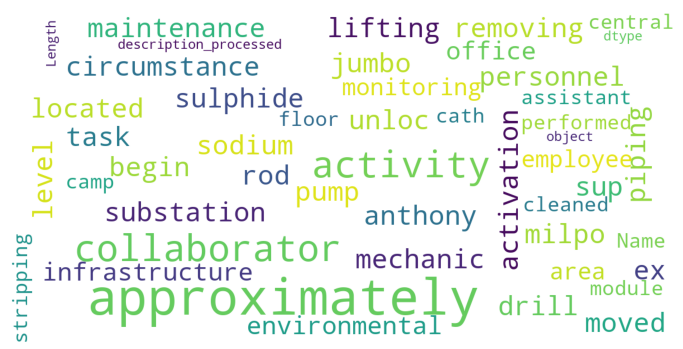

In [ ]:
wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
desc = data['description_processed']
wordcloud=wordcloud.generate(str(desc))

fig = plt.figure(1, figsize=(12, 12)) 
plt.axis('off')
 
plt.imshow(wordcloud)
plt.show()

##**Model Building** 

##**Bag of Words**

###**Target label - Accident level**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = data['description_processed']
y = data['Accident Level']

cnt_vec = CountVectorizer(analyzer='word', ngram_range=(1, 2))
Xc = cnt_vec.fit_transform(X).toarray()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, y, test_size=0.15, random_state=42)


**Using Countvectorizer**

In [ ]:
Xc_train.shape

(361, 13242)

In [ ]:
Xc_test.shape

(64, 13242)

####**SVC Model Training and Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC

svc = LinearSVC( max_iter=2500)
svc.fit(Xc_train, yc_train)
yc_pred01 = svc.predict(Xc_test)

# Evaluation
acc_svc = accuracy_score(yc_test, yc_pred01)
acc_svc_tr = svc.score(Xc_train, yc_train)
print("Train accuracy of the SVC model : {:.2f}".format(acc_svc_tr*100))
print("Test accuracy of the SVC model : {:.2f}".format(acc_svc*100))
#print('Classification report:',classification_report(y_test01, y_pred01))

Train accuracy of the SVC model : 99.45
Test accuracy of the SVC model : 78.12


####**Random Forest model Training and Evaluation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(Xc_train, yc_train)
yc_pred02 = rfc.predict(Xc_test)

acc_rfc = accuracy_score(yc_test, yc_pred02)
acc_rfc_tr = rfc.score(Xc_train,yc_train)

print("Train Accuracy of the Random Forest model : {:.2f}".format(acc_rfc_tr*100))
print("Test Accuracy of the Random Forest model : {:.2f}".format(acc_rfc*100))
print('Classification report:',classification_report(yc_test, yc_pred02))
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred02))

Train Accuracy of the Random Forest model : 99.45
Test Accuracy of the Random Forest model : 78.12
Classification report:               precision    recall  f1-score   support

           0       0.78      1.00      0.88        50
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2

    accuracy                           0.78        64
   macro avg       0.16      0.20      0.18        64
weighted avg       0.61      0.78      0.69        64

Confusion matrix: [[50  0  0  0  0]
 [ 5  0  0  0  0]
 [ 3  0  0  0  0]
 [ 4  0  0  0  0]
 [ 2  0  0  0  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



####**Gradient Boosting model for Training and Evaluation**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(Xc_train, yc_train)
yc_pred03 = gbc.predict(Xc_test)
acc_gbc = accuracy_score(yc_test, yc_pred03)
acc_gbc_tr = gbc.score(Xc_train,yc_train)

print(" Test accuracy of the Gradient boosting model : {:.2f}".format(acc_gbc*100))
print("Train accuracy of the Gradient boosting model : {:.2f}".format(acc_gbc_tr*100))
#print('Classification report:',classification_report(y_test01, y_pred03))


 Test accuracy of the Gradient boosting model : 75.00
Train accuracy of the Gradient boosting model : 99.45


####**XGBoost Model for Training and Evaluation**

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(Xc_train, yc_train)
yc_pred04 = xgbc.predict(Xc_test)
acc_xgbc = accuracy_score(yc_test, yc_pred03)
acc_xgbc_tr = xgbc.score(Xc_train,yc_train)

print(" Test accuracy of the XGBoost model : {:.2f}".format(acc_xgbc*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(acc_xgbc_tr*100))


 Test accuracy of the XGBoost model : 75.00
Train accuracy of the XGBoost model : 91.97


###**Target label - Potential Accident level**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = data['description_processed']
yp = data['Potential Accident Level']

cnt_vecp = CountVectorizer(analyzer='word', ngram_range=(1, 2))
Xp = cnt_vecp.fit_transform(X).toarray()
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.15, random_state=42)

In [ ]:
Xp_test.shape

(64, 13242)

####**SVC Model Training and Evaluation**

In [ ]:
svcp = LinearSVC( max_iter=5500)
svcp.fit(Xp_train, yp_train)
yp_pred01 = svcp.predict(Xp_test)

# Evaluation
accp_svc = accuracy_score(yp_test, yp_pred01)
accp_svc_tr = svcp.score(Xp_train,yp_train)

print("Test accuracy of the SVC model : {:.2f}".format(accp_svc*100))
print("Train accuracy of the SVC model : {:.2f}".format(accp_svc_tr*100))

Test accuracy of the SVC model : 43.75
Train accuracy of the SVC model : 99.72


####**Random Forest model Training and Evaluation**

In [ ]:
rfcp = RandomForestClassifier(random_state=42)
rfcp.fit(Xp_train, yp_train)
yp_pred02 = rfcp.predict(Xp_test)

#Evaluation
accp_rfc = accuracy_score(yp_test, yp_pred02)
accp_rfc_tr = rfcp.score(Xp_train,yp_train)

print("Test accuracy of the Random Forest model : {:.2f}".format(accp_rfc*100))
print("Train accuracy of the Random Forest model : {:.2f}".format(accp_rfc_tr*100))


Test accuracy of the Random Forest model : 35.94
Train accuracy of the Random Forest model : 99.72


####**Gradient Boosting Model Building and Evaluation**

In [ ]:

gbcp = GradientBoostingClassifier(n_estimators=100,)
gbcp.fit(Xp_train, yp_train)
yp_pred03 = gbcp.predict(Xp_test)
accp_gbc = accuracy_score(yp_test, yp_pred03)
accp_gbc_tr = gbcp.score(Xp_train,yp_train)

print(" Test accuracy of the Gradient boosting model : {:.2f}".format(accp_gbc*100))
print("Train accuracy of the Gradient boosting model : {:.2f}".format(accp_gbc_tr*100))

 Test accuracy of the Gradient boosting model : 45.31
Train accuracy of the Gradient boosting model : 99.72


####**XGBoost Model for Training and Evaluation**

In [ ]:
xgbcp = XGBClassifier()
xgbcp.fit(Xp_train, yp_train)
yp_pred04 = xgbcp.predict(Xp_test)
accp_xgbc = accuracy_score(yp_test, yp_pred04)
accp_xgbc_tr = xgbcp.score(Xp_train,yp_train)

print(" Test accuracy of the XGBoost model : {:.2f}".format(accp_xgbc*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(accp_xgbc_tr*100))

 Test accuracy of the XGBoost model : 39.06
Train accuracy of the XGBoost model : 90.86


##**TF-IDF**

###**Target label - Accident level**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(ngram_range=(1,2))
Xt = tfidf_vec.fit_transform(X).toarray()

Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, y, test_size=0.15, random_state=42)


####**Gradient Boosting Model Building and Evaluation**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(n_estimators=100)
gbct.fit(Xt_train, yt_train)
yt_pred01 = gbct.predict(Xt_test)
acct_gbc = accuracy_score(yt_test, yt_pred01)
acct_gbc_tr = gbct.score(Xt_train,yt_train)

print("Train accuracy of the Gradient boosting model : {:.2f}".format(acct_gbc*100))
print("Test accuracy of the Gradient boosting model : {:.2f}".format(acct_gbc_tr*100))
print('Classification report:',classification_report(yt_test, yt_pred01))



Train accuracy of the Gradient boosting model : 75.00
Test accuracy of the Gradient boosting model : 99.45
Classification report:               precision    recall  f1-score   support

           0       0.80      0.94      0.86        50
           1       0.00      0.00      0.00         5
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2

    accuracy                           0.75        64
   macro avg       0.36      0.25      0.27        64
weighted avg       0.67      0.75      0.70        64



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



####**Random Forest model Training and Evaluation**

In [ ]:
rfct = RandomForestClassifier(random_state=42)
rfct.fit(Xt_train, yt_train)
yt_pred02 = rfct.predict(Xt_test)

acct_rfc = accuracy_score(yt_test, yt_pred02)
acct_rfc_tr = rfct.score(Xt_train,yt_train)

print("Test accuracy of the Random Forest model : {:.2f}".format(acct_rfc*100))
print("Train accuracy of the Random Forest model : {:.2f}".format(acct_rfc_tr*100))

Test accuracy of the Random Forest model : 78.12
Train accuracy of the Random Forest model : 99.45


####**SVC Model Training and Evaluation**

In [ ]:
svct = LinearSVC(max_iter=5500)
svct.fit(Xt_train, yt_train)
yt_pred03 = svct.predict(Xt_test)

# Evaluation
acct_svc = accuracy_score(yt_test, yt_pred03)
acct_svc_tr = svct.score(Xt_train,yt_train)

print("Test accuracy of the SVC model : {:.2f}".format(acct_svc*100))
print("Train accuracy of the SVC model : {:.2f}".format(acct_svc_tr*100))

Test accuracy of the SVC model : 78.12
Train accuracy of the SVC model : 99.17


####**XGBoost Model for Training and Evaluation**

In [ ]:
xgbct = XGBClassifier()
xgbct.fit(Xt_train, yt_train)
yt_pred04 = xgbct.predict(Xt_test)
acct_xgbc = accuracy_score(yt_test, yt_pred04)
acct_xgbc_tr = xgbct.score(Xt_train,yt_train)

print(" Test accuracy of the XGBoost model : {:.2f}".format(acct_xgbc*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(acct_xgbc_tr*100))

 Test accuracy of the XGBoost model : 76.56
Train accuracy of the XGBoost model : 95.57


###**Target label - Potential Accident level**

In [ ]:
tfidf_vecp = TfidfVectorizer(ngram_range=(1,2))
Xtp = tfidf_vecp.fit_transform(X).toarray()

Xtp_train, Xtp_test, ytp_train, ytp_test = train_test_split(Xtp, yp, test_size=0.15, random_state=42)


####**Gradient Boosting Model Building and Evaluation**

In [ ]:
gbctp = GradientBoostingClassifier(n_estimators=100)
gbctp.fit(Xtp_train, ytp_train)
ytp_pred01 = gbctp.predict(Xtp_test)
acctp_gbc = accuracy_score(ytp_test, ytp_pred01)
acctp_gbc_tr = gbctp.score(Xtp_train, ytp_train)

print("Test accuracy of the Gradient boosting model : {:.2f}".format(acctp_gbc*100))
print("Train accuracy of the Gradient boosting model : {:.2f}".format(acctp_gbc_tr*100))
#print('Classification report:',classification_report(yp_test02, y2p_pred03))

Test accuracy of the Gradient boosting model : 40.62
Train accuracy of the Gradient boosting model : 99.72


####**Random Forest model Training and Evaluation**

In [ ]:
rfctp = RandomForestClassifier(random_state=42)
rfctp.fit(Xtp_train, ytp_train)
ytp_pred02 = rfctp.predict(Xtp_test)

acctp_rfc = accuracy_score(ytp_test, ytp_pred02)
acctp_rfc_tr = rfctp.score(Xtp_train, ytp_train)

print("Test accuracy of the Random Forest model : {:.2f}".format(acctp_rfc*100))
print("Train accuracy of the Random Forest model : {:.2f}".format(acctp_rfc_tr*100))

Test accuracy of the Random Forest model : 37.50
Train accuracy of the Random Forest model : 99.72


####**SVC Model Training and Evaluation**

In [ ]:
svctp = LinearSVC(max_iter=5500)
svctp.fit(Xtp_train, ytp_train)
ytp_pred03 = svctp.predict(Xtp_test)

# Evaluation
acctp_svc = accuracy_score(ytp_test, ytp_pred03)
acctp_svc_tr = svctp.score(Xtp_train,ytp_train)

print("Test accuracy of the SVC model : {:.2f}".format(acctp_svc*100))
print("Train accuracy of the SVC model : {:.2f}".format(acctp_svc_tr*100))

Test accuracy of the SVC model : 39.06
Train accuracy of the SVC model : 99.72


####**XGBoost Model for Training and Evaluation**

In [ ]:
xgbctp = XGBClassifier()
xgbctp.fit(Xtp_train, ytp_train)
ytp_pred04 = xgbctp.predict(Xtp_test)
acctp_xgbc = accuracy_score(ytp_test, ytp_pred04)
acctp_xgbc_tr = xgbct.score(Xtp_train,ytp_train)

print(" Test accuracy of the XGBoost model : {:.2f}".format(acctp_xgbc*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(acctp_xgbc_tr*100))

 Test accuracy of the XGBoost model : 40.62
Train accuracy of the XGBoost model : 19.94


##**Word2Vec**

####**Target Label : Accident Level**

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant

In [ ]:
max_features = 10000
maxlen = max(lgt)
embedding_size = 200

In [ ]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(data['description_processed']))

In [ ]:
Xw = tokenizer.texts_to_sequences(data['description_processed'])
Xw = pad_sequences(Xw, maxlen = maxlen)
yw = y



In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [ ]:
# Reserve padding (indexed zero)
w2i = tokenizer.word_index
vocab_size = len(w2i) + 1

In [ ]:
  
EMBEDDING_FILE = '/content/drive/MyDrive/NLP_Project/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(' ')[0]
    embd = o.split(' ')[1:]
    embd = np.asarray(embd, dtype = 'float32')
    embeddings[word] = embd

In [ ]:
num_words = min(max_features, vocab_size) + 1

embedding_matrix = np.zeros((num_words, embedding_size))
for word, i in tokenizer.word_index.items():
    if i > max_features: continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [ ]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size = 0.3, random_state = 42, shuffle = True)


In [ ]:

model = Sequential()
model.add(Embedding(num_words, embedding_size, embeddings_initializer = Constant(embedding_matrix), input_length = maxlen, trainable = False))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5, input_shape = (256,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (128,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (64,)))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
batch_size = 30
epochs = 10

h = model.fit(Xw_train, yw_train, epochs = epochs, validation_split = 0.2, batch_size = batch_size, verbose = 2)


Epoch 1/10
8/8 - 7s - loss: 1.3904 - accuracy: 0.4937 - val_loss: 0.8634 - val_accuracy: 0.7833
Epoch 2/10
8/8 - 2s - loss: 1.2082 - accuracy: 0.6624 - val_loss: 0.8091 - val_accuracy: 0.7833
Epoch 3/10
8/8 - 2s - loss: 1.0983 - accuracy: 0.6920 - val_loss: 0.8440 - val_accuracy: 0.7833
Epoch 4/10
8/8 - 2s - loss: 1.0363 - accuracy: 0.6962 - val_loss: 0.9042 - val_accuracy: 0.7833
Epoch 5/10
8/8 - 2s - loss: 1.0893 - accuracy: 0.7004 - val_loss: 0.8391 - val_accuracy: 0.7833
Epoch 6/10
8/8 - 2s - loss: 1.0897 - accuracy: 0.7046 - val_loss: 0.8383 - val_accuracy: 0.7833
Epoch 7/10
8/8 - 2s - loss: 1.0400 - accuracy: 0.7131 - val_loss: 0.8867 - val_accuracy: 0.7833
Epoch 8/10
8/8 - 2s - loss: 1.0290 - accuracy: 0.7131 - val_loss: 0.8343 - val_accuracy: 0.7833
Epoch 9/10
8/8 - 2s - loss: 1.0029 - accuracy: 0.7089 - val_loss: 0.7944 - val_accuracy: 0.7833
Epoch 10/10
8/8 - 2s - loss: 0.9797 - accuracy: 0.7131 - val_loss: 0.8066 - val_accuracy: 0.7833


In [ ]:
loss, accuracy = model.evaluate(Xw_test, yw_test, verbose = 0)
print('Overall Accuracy: {}'.format(round(accuracy * 100, 0)))

Overall Accuracy: 78.0


In [ ]:
yw_pred = (model.predict(Xw_test) > 0.5).astype('int32')
#print(f'Classification Report:\n{classification_report(yw_pred, yw_test)}')

In [ ]:
np.unique(yw_pred)

array([0, 1], dtype=int32)

####**Target Label : Potential Accident Level**

In [ ]:
Xwp_train, Xwp_test, ywp_train, ywp_test = train_test_split(Xw, yp, test_size = 0.3, random_state = 42, shuffle = True)


In [ ]:
modelB = Sequential()
modelB.add(Embedding(num_words, embedding_size, embeddings_initializer = Constant(embedding_matrix), input_length = maxlen, trainable = False))
modelB.add(Bidirectional(LSTM(128, return_sequences = True)))
modelB.add(GlobalMaxPool1D())
modelB.add(Dropout(0.5, input_shape = (256,)))
modelB.add(Dense(128, activation = 'relu'))
modelB.add(Dropout(0.5, input_shape = (128,)))
modelB.add(Dense(64, activation = 'relu'))
modelB.add(Dropout(0.5, input_shape = (64,)))
modelB.add(Dense(6, activation = 'softmax'))

modelB.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:

hp = modelB.fit(Xwp_train, ywp_train, epochs = epochs, validation_split = 0.2, batch_size = batch_size, verbose = 2)

Epoch 1/10
8/8 - 6s - loss: 1.8208 - accuracy: 0.2236 - val_loss: 1.6316 - val_accuracy: 0.3333
Epoch 2/10
8/8 - 2s - loss: 1.6119 - accuracy: 0.3249 - val_loss: 1.6021 - val_accuracy: 0.3333
Epoch 3/10
8/8 - 2s - loss: 1.6506 - accuracy: 0.3080 - val_loss: 1.5937 - val_accuracy: 0.3333
Epoch 4/10
8/8 - 2s - loss: 1.5595 - accuracy: 0.3333 - val_loss: 1.5903 - val_accuracy: 0.3333
Epoch 5/10
8/8 - 2s - loss: 1.5710 - accuracy: 0.3080 - val_loss: 1.5737 - val_accuracy: 0.3333
Epoch 6/10
8/8 - 2s - loss: 1.6343 - accuracy: 0.3080 - val_loss: 1.5572 - val_accuracy: 0.3333
Epoch 7/10
8/8 - 2s - loss: 1.5318 - accuracy: 0.3291 - val_loss: 1.5463 - val_accuracy: 0.3333
Epoch 8/10
8/8 - 2s - loss: 1.5268 - accuracy: 0.3291 - val_loss: 1.5296 - val_accuracy: 0.3333
Epoch 9/10
8/8 - 2s - loss: 1.4946 - accuracy: 0.3333 - val_loss: 1.5161 - val_accuracy: 0.3333
Epoch 10/10
8/8 - 2s - loss: 1.5268 - accuracy: 0.2996 - val_loss: 1.5008 - val_accuracy: 0.3333


In [ ]:
lossp, accuracyp = modelB.evaluate(Xwp_test, ywp_test, verbose = 0)
print('Overall Accuracy: {}'.format(round(accuracyp * 100, 0)))

Overall Accuracy: 29.0


In [ ]:
ywp_pred = (model.predict(Xw_test) > 0.5).astype('int32')

In [ ]:
np.unique(ywp_pred)

array([0, 1], dtype=int32)

###**Comparison of all the models by accuracy**

**Target label - Accident Level**

In [ ]:
models_list_accidentlevel = ["SVC using CountVectorizer","SVC using TF-IDF","Random Forest using CountVectorizer","Random Forest using TF-IDF",
                   "Gradient Boosting using CountVectorizer","Gradient Boosting using TF-IDF","XGBoost using CountVectorizer","XGBoost using TF-IDF","Word2Vec using LSTM"]

accuracy_accidentlevel = [acc_svc,acct_svc,acc_rfc,acct_rfc,acc_gbc,acct_gbc,acc_xgbc,acct_xgbc,accuracy]
print(accuracy_accidentlevel)

[0.78125, 0.78125, 0.78125, 0.78125, 0.75, 0.75, 0.75, 0.765625, 0.78125]


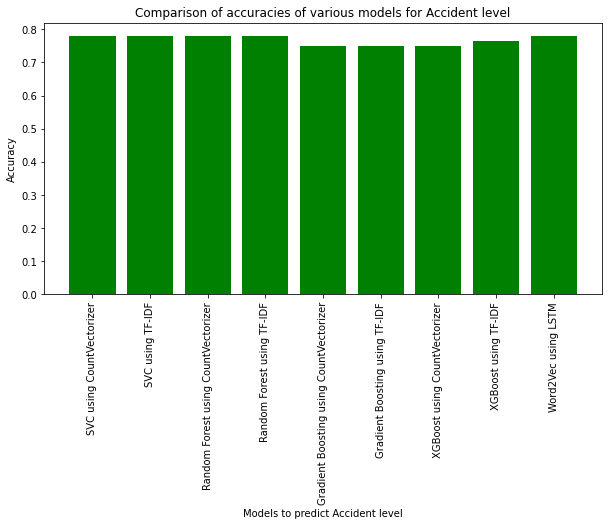

In [ ]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(models_list_accidentlevel, accuracy_accidentlevel, color ='green',width=0.8,) 
  
plt.xlabel("Models to predict Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracies of various models for Accident level") 
plt.show() 

In comparison of all the above models for target label Accident level, we can say that SVC using CountVectorizer, SVC using TF-IDF, Random forest using CountVectorizer, Random Forest using TF-IDF and Word2Vec using are having better accuracies than others.

We choose SVC using CountVectorizer model.

**Target label - Potential Accident label**

In [ ]:
models_list_potentialaccidentlevel = ["SVC using CountVectorizer","SVC using TF-IDF","Random Forest using CountVectorizer","Random Forest using TF-IDF",
                   "Gradient Boosting using CountVectorizer","Gradient Boosting using TF-IDF","XGBoost using CountVectorizer","XGBoost using TF-IDF","Word2Vec using LSTM"]

accuracy_potentialaccidentlevel = [accp_svc,acctp_svc,accp_rfc,acctp_rfc,accp_gbc,acctp_gbc,accp_xgbc,acctp_xgbc,accuracyp]
print(accuracy_potentialaccidentlevel)

[0.4375, 0.390625, 0.359375, 0.375, 0.453125, 0.40625, 0.390625, 0.40625, 0.2890625]


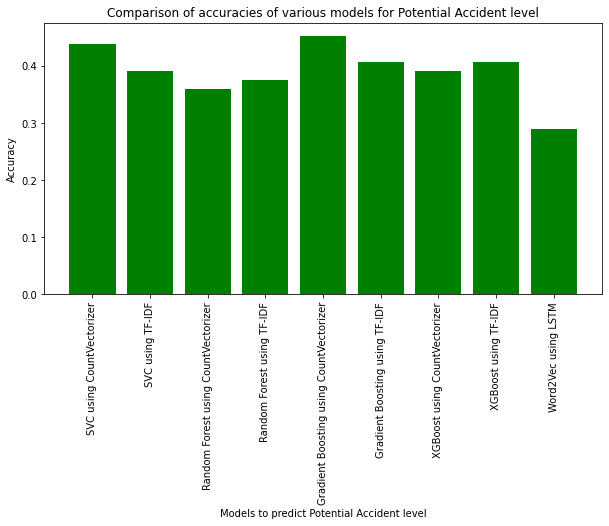

In [ ]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(models_list_potentialaccidentlevel, accuracy_potentialaccidentlevel, color ='green',width=0.8,) 
  
plt.xlabel("Models to predict Potential Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracies of various models for Potential Accident level") 
plt.show() 

In comparison of all the above models for target label Potential accident level, we can say that SVC using CountVectorizer and Gradient boosting using CountVectorizer are having better accuracies than others.

We can choose SVC using CountVectorizer, since it's common for both the targe labels.

Finally, SVC using CountVectorizer model is chosen and used to predict the target labels, Accident level and Potential Accident level respectively.

**Pickling**

Pickling is done to save the model onto the disk. We serialize the model providing best accuracy and then load the saved model into memory whenever necessary. In our model, the best accuracies for both Accident Level and Potential Accident Level models were obtained from the Support Vector Classifer using CountVectorizer, we pickle these two models, i.e., 'svc' for Accident Level and 'svctp' for Potential Accident Level.    

In [ ]:
#importing pickle library for pickling
import pickle

#saving models onto the disk
pickle.dump(svc,open('/content/drive/MyDrive/NLP_Project/accident_level.sav','wb'))
pickle.dump(svctp,open('/content/drive/MyDrive/NLP_Project/potential_accident.sav','wb'))

In [ ]:
# loading the pickled model
#Accident level target label
loaded_model_acclevel = pickle.load(open('/content/drive/MyDrive/NLP_Project/accident_level.sav', 'rb'))
result_acclevel = loaded_model_acclevel.score(Xc_test, yc_test)
print(f'Test accuracy : {result_acclevel}')

Test accuracy : 0.78125


In [ ]:
#Potential Accident level target label
loaded_model_potacclevel = pickle.load(open('/content/drive/MyDrive/NLP_Project/potential_accident.sav', 'rb'))
result_potacclevel = loaded_model_potacclevel.score(Xp_test, yp_test)
print(f'Test accuracy : {result_potacclevel}')


Test accuracy : 0.46875
